d:\python\lib\site-packages\sklearn\gaussian_process\kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


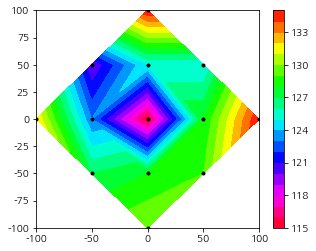

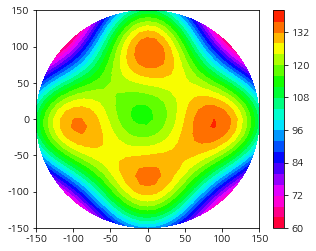

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# train set
x = [0, -50, 0, 50, -50, 50, -50, 0, 50, -100, 0, 100, 0]
y = [0, 50, 50, 50, 0, 0, -50, -50, -50, 0, 100, 0, -100]
thk = [115, 120, 125, 125, 123, 128, 127, 128, 129, 132, 135, 135, 130]


x_train = []
for i in range(len(x)) :
    x_train.append([x[i],y[i]])
x_train = np.array(x_train)
y_train = np.array(thk)

# test set
XY = []

for r in np.arange(0,151,10) :
    for rr in np.arange(0,r+1,10) :
        XY.append([-rr,np.sqrt(r**2-rr**2)])
        XY.append([rr,np.sqrt(r**2-rr**2)])
        XY.append([-rr,-np.sqrt(r**2-rr**2)])
        XY.append([rr,-np.sqrt(r**2-rr**2)])
        XY.append([np.sqrt(r**2-rr**2),-rr])
        XY.append([np.sqrt(r**2-rr**2),rr])
        XY.append([-np.sqrt(r**2-rr**2),-rr])
        XY.append([-np.sqrt(r**2-rr**2),rr])
x_test = np.array(XY)

# Gaussian Process
kernel = C(1.0, (1e-3, 1e3)) * RBF(10)
gp = GaussianProcessRegressor(kernel=kernel)

gp.fit(x_train, y_train)
y_test = gp.predict(x_test)

x_merge = np.concatenate((x_train, x_test),axis=0)
thk_merge = np.concatenate((y_train, y_test),axis=0)

x1 = []
y1 = []
z1 = []
for i in range(len(x_merge)) :
    x1.append(x_merge[i,0])
    y1.append(x_merge[i,1])
    z1.append(thk_merge[i])
    
# train plot
plt.figure(figsize=(5,4))
plt.tricontourf(x,y,thk, 20, cmap='hsv_r')
plt.plot(x,y, 'k.')
plt.colorbar()

# test1 plot
plt.figure(figsize=(5,4))
plt.tricontourf(x1,y1,z1, 20, cmap='hsv_r')
#plt.plot(x1,y1, 'rx')
plt.colorbar()